In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_quantity = pd.read_csv('ratnagiri_mango_verified_2012_2024.csv')
df_daily_weather = pd.read_csv('final_daily_weather.csv', parse_dates=["date"])
df_hourly_weather = pd.read_csv('final_hourly_weather.csv', parse_dates=["date"])

In [6]:
df_quantity.head()

,Year,Area_Hectares,Production_MT,Productivity_MT_per_Ha,Weather_Impact_Analysis,Primary_Source,Growth_Rate_Annual
0,2012,67500,117664,1.74,Baseline year - no specific data,NABARD PLP Baseline Assessment,NaN
1,2013,67200,119500,1.78,Normal weather conditions,Agricultural Development Study 2006-2021 (Phar...,NaN
2,2014,66800,121200,1.81,Favorable growing conditions,Agricultural Development Study 2006-2021 (Phar...,1.42
3,2015,66500,124800,1.88,Optimal weather - peak production,Agricultural Development Study 2006-2021 (Phar...,3.00
4,2016,66200,126500,1.91,Good monsoon and temperature,Agricultural Development Study 2006-2021 (Phar...,1.36


the quantity is in metric tonnes

In [5]:
df_daily_weather.head()

,date,temperature_2m_mean,temperature_2m_max,temperature_2m_min,rain_sum,precipitation_hours,sunshine_duration
0,2012-01-01,26.205751,30.562,23.112,0.0,0,36309.457
1,2012-01-02,26.049500,30.462,22.662,0.0,0,36034.824
2,2012-01-03,25.316164,31.212,20.662,0.0,0,36792.152
3,2012-01-04,25.411997,32.412,20.062,0.0,0,36897.800
4,2012-01-05,25.999504,32.512,20.412,0.0,0,36805.586


In [6]:
df_hourly_weather.head()

,date,relative_humidity_2m,rain,dew_point_2m,cloud_cover,temperature_2m
0,2012-01-01 00:00:00,72.617530,0.0,19.462000,0,24.712000
1,2012-01-01 01:00:00,74.766470,0.0,19.112000,1,23.862000
2,2012-01-01 02:00:00,75.428185,0.0,19.012001,0,23.612000
3,2012-01-01 03:00:00,79.473530,0.0,19.512001,1,23.262001
4,2012-01-01 04:00:00,79.466620,0.0,19.462000,6,23.212000


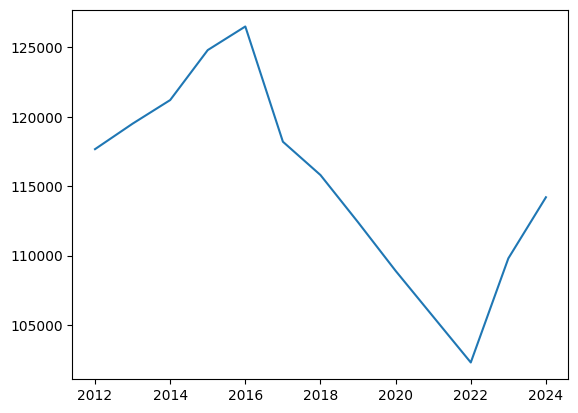

In [8]:
quantity = df_quantity.Production_MT
year = df_quantity.Year

plt.plot(year, quantity)

In [9]:
#variables
mean_temp = df_daily_weather.temperature_2m_mean
rain_sum = df_daily_weather.rain_sum

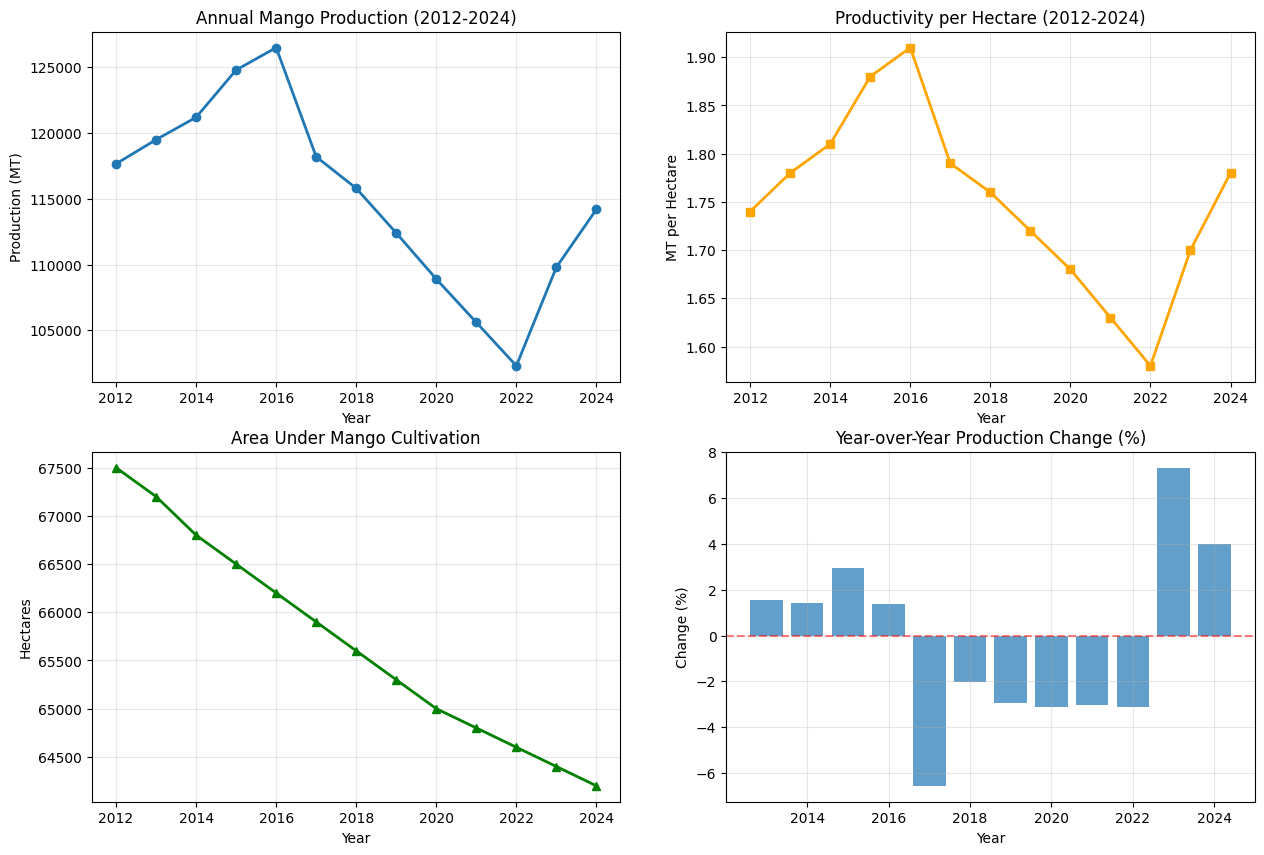

In [10]:
# Production trend analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Annual production trend
axes[0,0].plot(df_quantity['Year'], df_quantity['Production_MT'], marker='o', linewidth=2)
axes[0,0].set_title('Annual Mango Production (2012-2024)')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Production (MT)')
axes[0,0].grid(True, alpha=0.3)

# Productivity per hectare trend
axes[0,1].plot(df_quantity['Year'], df_quantity['Productivity_MT_per_Ha'], marker='s', color='orange', linewidth=2)
axes[0,1].set_title('Productivity per Hectare (2012-2024)')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('MT per Hectare')
axes[0,1].grid(True, alpha=0.3)

# Area under cultivation
axes[1,0].plot(df_quantity['Year'], df_quantity['Area_Hectares'], marker='^', color='green', linewidth=2)
axes[1,0].set_title('Area Under Mango Cultivation')
axes[1,0].set_xlabel('Year')
axes[1,0].set_ylabel('Hectares')
axes[1,0].grid(True, alpha=0.3)

# Year-over-year production change
production_change = df_quantity['Production_MT'].pct_change() * 100
axes[1,1].bar(df_quantity['Year'][1:], production_change[1:], alpha=0.7)
axes[1,1].set_title('Year-over-Year Production Change (%)')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Change (%)')
axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[1,1].grid(True, alpha=0.3)


/tmp/ipykernel_4256/567118299.py:38: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  heat_wave_days = df_daily_weather.groupby('year').apply(lambda x: (x['temperature_2m_max'] > 40).sum())
/tmp/ipykernel_4256/567118299.py:56: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  heavy_rain_days = df_daily_weather.groupby('year').apply(lambda x: (x['rain_sum'] > 50).sum())


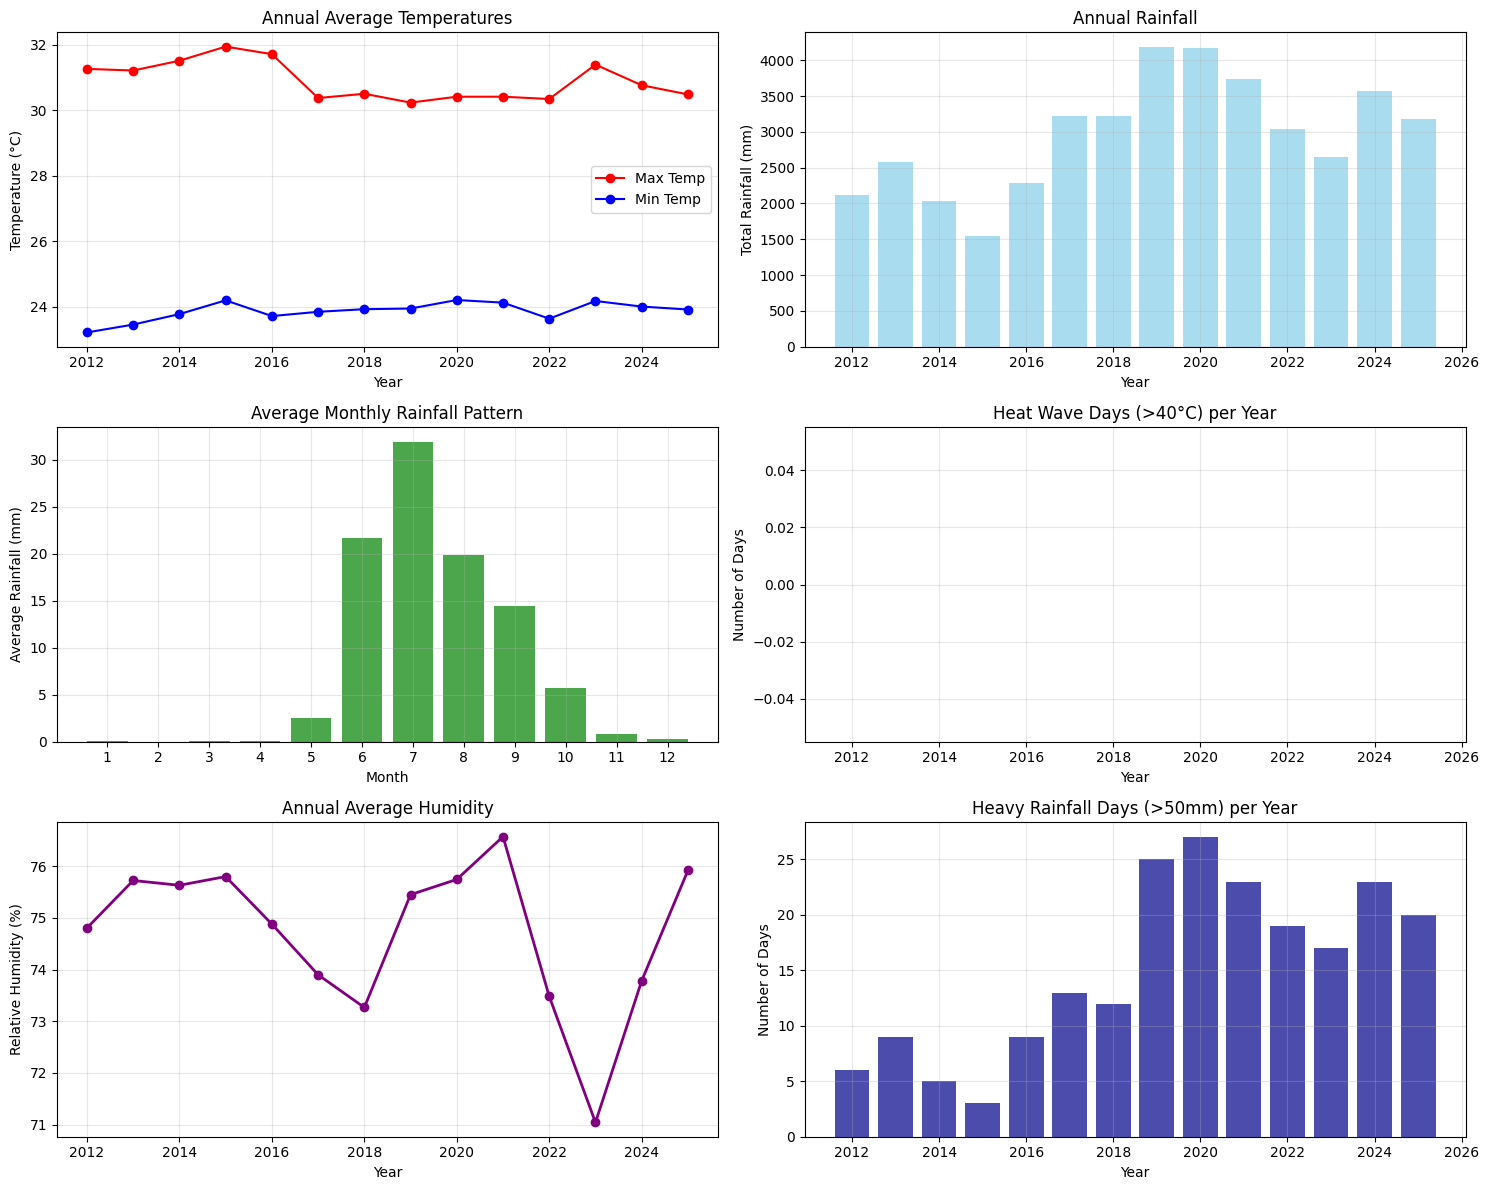

In [11]:
# Weather overview plots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Daily temperature trends
df_daily_weather['year'] = df_daily_weather['date'].dt.year
yearly_temp = df_daily_weather.groupby('year').agg({
    'temperature_2m_max': 'mean',
    'temperature_2m_min': 'mean'
}).round(2)

axes[0,0].plot(yearly_temp.index, yearly_temp['temperature_2m_max'], marker='o', label='Max Temp', color='red')
axes[0,0].plot(yearly_temp.index, yearly_temp['temperature_2m_min'], marker='o', label='Min Temp', color='blue')
axes[0,0].set_title('Annual Average Temperatures')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Temperature (°C)')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# Annual rainfall
yearly_rainfall = df_daily_weather.groupby('year')['rain_sum'].sum()
axes[0,1].bar(yearly_rainfall.index, yearly_rainfall.values, alpha=0.7, color='skyblue')
axes[0,1].set_title('Annual Rainfall')
axes[0,1].set_xlabel('Year')
axes[0,1].set_ylabel('Total Rainfall (mm)')
axes[0,1].grid(True, alpha=0.3)

# Monthly rainfall pattern (all years combined)
df_daily_weather['month'] = df_daily_weather['date'].dt.month
monthly_rainfall = df_daily_weather.groupby('month')['rain_sum'].mean()
axes[1,0].bar(monthly_rainfall.index, monthly_rainfall.values, alpha=0.7, color='green')
axes[1,0].set_title('Average Monthly Rainfall Pattern')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Average Rainfall (mm)')
axes[1,0].set_xticks(range(1,13))
axes[1,0].grid(True, alpha=0.3)

# Extreme weather events
heat_wave_days = df_daily_weather.groupby('year').apply(lambda x: (x['temperature_2m_max'] > 40).sum())
axes[1,1].bar(heat_wave_days.index, heat_wave_days.values, alpha=0.7, color='red')
axes[1,1].set_title('Heat Wave Days (>40°C) per Year')
axes[1,1].set_xlabel('Year')
axes[1,1].set_ylabel('Number of Days')
axes[1,1].grid(True, alpha=0.3)

# Humidity analysis (if available in hourly data)
if 'relative_humidity_2m' in df_hourly_weather.columns:
    df_hourly_weather['year'] = df_hourly_weather['date'].dt.year
    yearly_humidity = df_hourly_weather.groupby('year')['relative_humidity_2m'].mean()
    axes[2,0].plot(yearly_humidity.index, yearly_humidity.values, marker='o', color='purple', linewidth=2)
    axes[2,0].set_title('Annual Average Humidity')
    axes[2,0].set_xlabel('Year')
    axes[2,0].set_ylabel('Relative Humidity (%)')
    axes[2,0].grid(True, alpha=0.3)

# Heavy rainfall days
heavy_rain_days = df_daily_weather.groupby('year').apply(lambda x: (x['rain_sum'] > 50).sum())
axes[2,1].bar(heavy_rain_days.index, heavy_rain_days.values, alpha=0.7, color='darkblue')
axes[2,1].set_title('Heavy Rainfall Days (>50mm) per Year')
axes[2,1].set_xlabel('Year')
axes[2,1].set_ylabel('Number of Days')
axes[2,1].grid(True, alpha=0.3)

plt.tight_layout()

# Weather-Production Correlation Analysis:

/tmp/ipykernel_4256/2022446783.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weather_annual['heat_wave_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['temperature_2m_max'] > 40).sum())
/tmp/ipykernel_4256/2022446783.py:15: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weather_annual['heavy_rain_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['rain_sum'] > 50).sum())


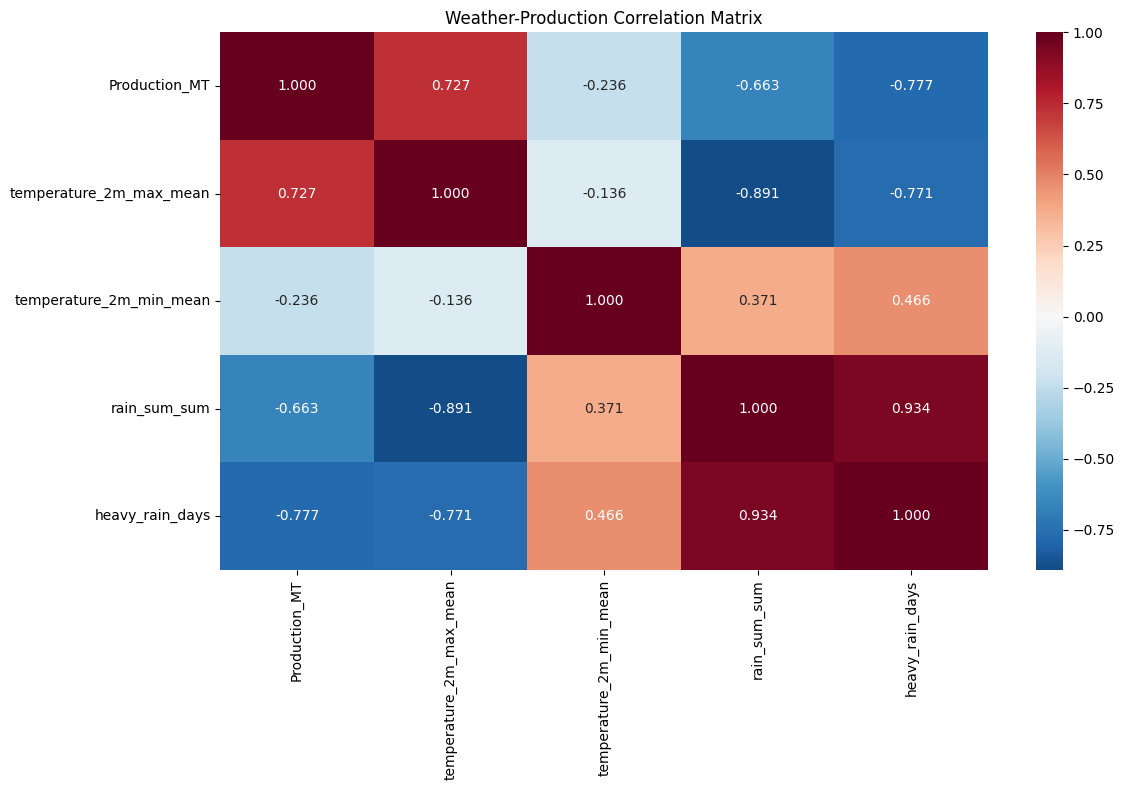

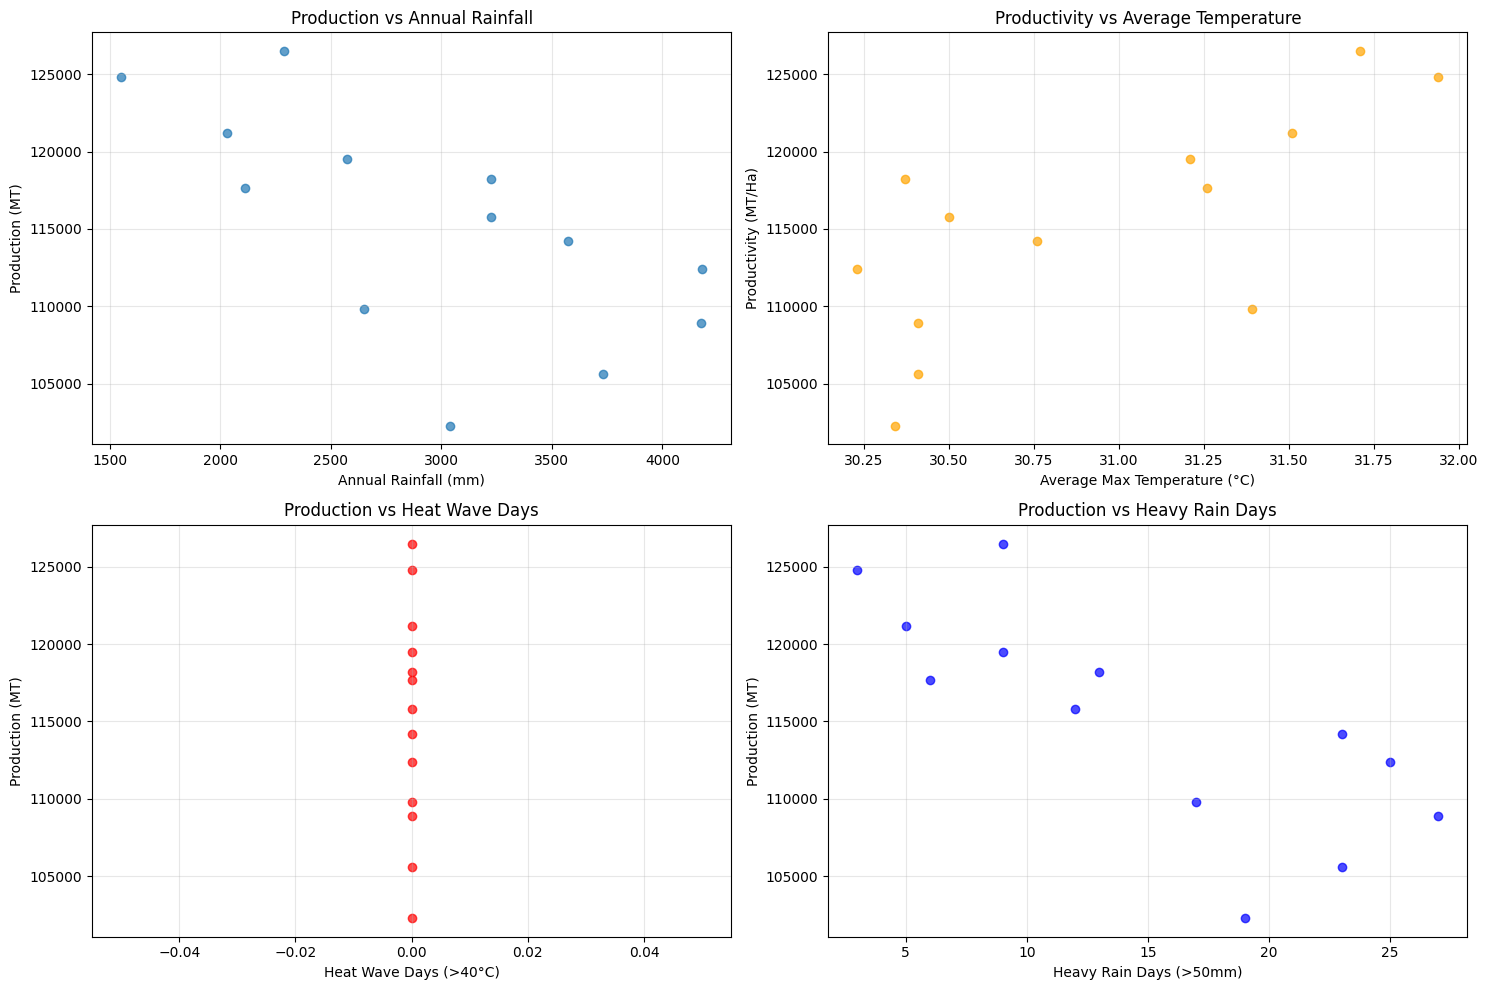

In [12]:
# Create correlation analysis between weather and production
# First, aggregate weather data by year to match production data
weather_annual = df_daily_weather.groupby('year').agg({
    'temperature_2m_max': ['mean', 'max'],
    'temperature_2m_min': ['mean', 'min'],
    'rain_sum': ['sum', 'mean', 'max'],
    'sunshine_duration': 'sum' if 'sunshine_duration' in df_daily_weather.columns else 'mean'
}).round(2)

# Flatten column names
weather_annual.columns = ['_'.join(col).strip() for col in weather_annual.columns]

# Add extreme weather indicators
weather_annual['heat_wave_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['temperature_2m_max'] > 40).sum())
weather_annual['heavy_rain_days'] = df_daily_weather.groupby('year').apply(lambda x: (x['rain_sum'] > 50).sum())

# Merge with production data
merged_data = df_quantity.merge(weather_annual, left_on='Year', right_index=True, how='inner')

# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_cols = ['Production_MT', 'temperature_2m_max_mean',
                   'temperature_2m_min_mean', 'rain_sum_sum', 'heavy_rain_days']
corr_matrix = merged_data[correlation_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', center=0, fmt='.3f')
plt.title('Weather-Production Correlation Matrix')
plt.tight_layout()
plt.show()

# Scatter plots for key correlations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Production vs Annual Rainfall
axes[0,0].scatter(merged_data['rain_sum_sum'], merged_data['Production_MT'], alpha=0.7)
axes[0,0].set_xlabel('Annual Rainfall (mm)')
axes[0,0].set_ylabel('Production (MT)')
axes[0,0].set_title('Production vs Annual Rainfall')
axes[0,0].grid(True, alpha=0.3)

# Productivity vs Average Temperature
axes[0,1].scatter(merged_data['temperature_2m_max_mean'], merged_data['Production_MT'], alpha=0.7, color='orange')
axes[0,1].set_xlabel('Average Max Temperature (°C)')
axes[0,1].set_ylabel('Productivity (MT/Ha)')
axes[0,1].set_title('Productivity vs Average Temperature')
axes[0,1].grid(True, alpha=0.3)

# Production vs Heat Wave Days
axes[1,0].scatter(merged_data['heat_wave_days'], merged_data['Production_MT'], alpha=0.7, color='red')
axes[1,0].set_xlabel('Heat Wave Days (>40°C)')
axes[1,0].set_ylabel('Production (MT)')
axes[1,0].set_title('Production vs Heat Wave Days')
axes[1,0].grid(True, alpha=0.3)

# Production vs Heavy Rain Days
axes[1,1].scatter(merged_data['heavy_rain_days'], merged_data['Production_MT'], alpha=0.7, color='blue')
axes[1,1].set_xlabel('Heavy Rain Days (>50mm)')
axes[1,1].set_ylabel('Production (MT)')
axes[1,1].set_title('Production vs Heavy Rain Days')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()